In [1]:
%matplotlib inline
import os
import pickle
from sdypy import EMA
import numpy as np
import matplotlib.pyplot as plt 
from EMA_functions import *
import pandas as pd
import matplotlib.animation as animation
# importlib.reload(EMA_functions)
# from EMA_functions import animate_mode_shape

c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# root_disp = os.path.normpath(r'G:/.shortcut-targets-by-id/1k1B8zPb3T8H7y6x0irFZnzzmfQPHMRPx/Illimited Lab Projects/Spiders/Simulations')
df = pd.read_csv('H:/My Drive/PHD/HSC/file_descriptions_wlocs.csv')
# file_name = "Full_web_ecc0_new_Floc4_v1" # First attempt
# file_name_vec = ['Full_web_ecc0_new_Floc9_v0', 
#                  'Full_web_ecc0_new_Floc9_v1', 
#                  'Full_web_ecc1_new_Floc1_v4',
#                  'Full_web_ecc1_new_Floc1_v5',
#                  'Full_web_ecc2_new_Floc7_v0',
#                  'Full_web_ecc2_new_Floc7_v1']
# file_name = file_name_vec[5]
file_name = 'Full_web_ecc2_new2_Floc18_v9'
EMA_structure = EMA_Structure(file_name)
video = EMA_structure.open_video()

EMA_structure.open_impact_data()
# video, fs_camera, t_camera = open_video(file_name, folder_paths)
# impact_data = open_impact_data(file_name)

roi_size = (9, 9)
reference_image = (0, 30)

EMA_structure.open_displacements(roi_size=roi_size, reference_image=reference_image, auto_nut_idx=True)
# EMA_structure.nut_idx((EMA_structure.prey_ij[0]+5, EMA_structure.prey_ij[1]))
video.info['Total Frame'], EMA_structure.nearest_nut_index,EMA_structure.impact_data['comment']

H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_new2_Floc18_v9_S01\Full_web_ecc2_new2_Floc18_v9_S01.cihx


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\pyMRAW.py:103: UserWarning: Clipped footage! (Total frame: 8000, Original total frame: 87371)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


(8000, 373, 'First impact')

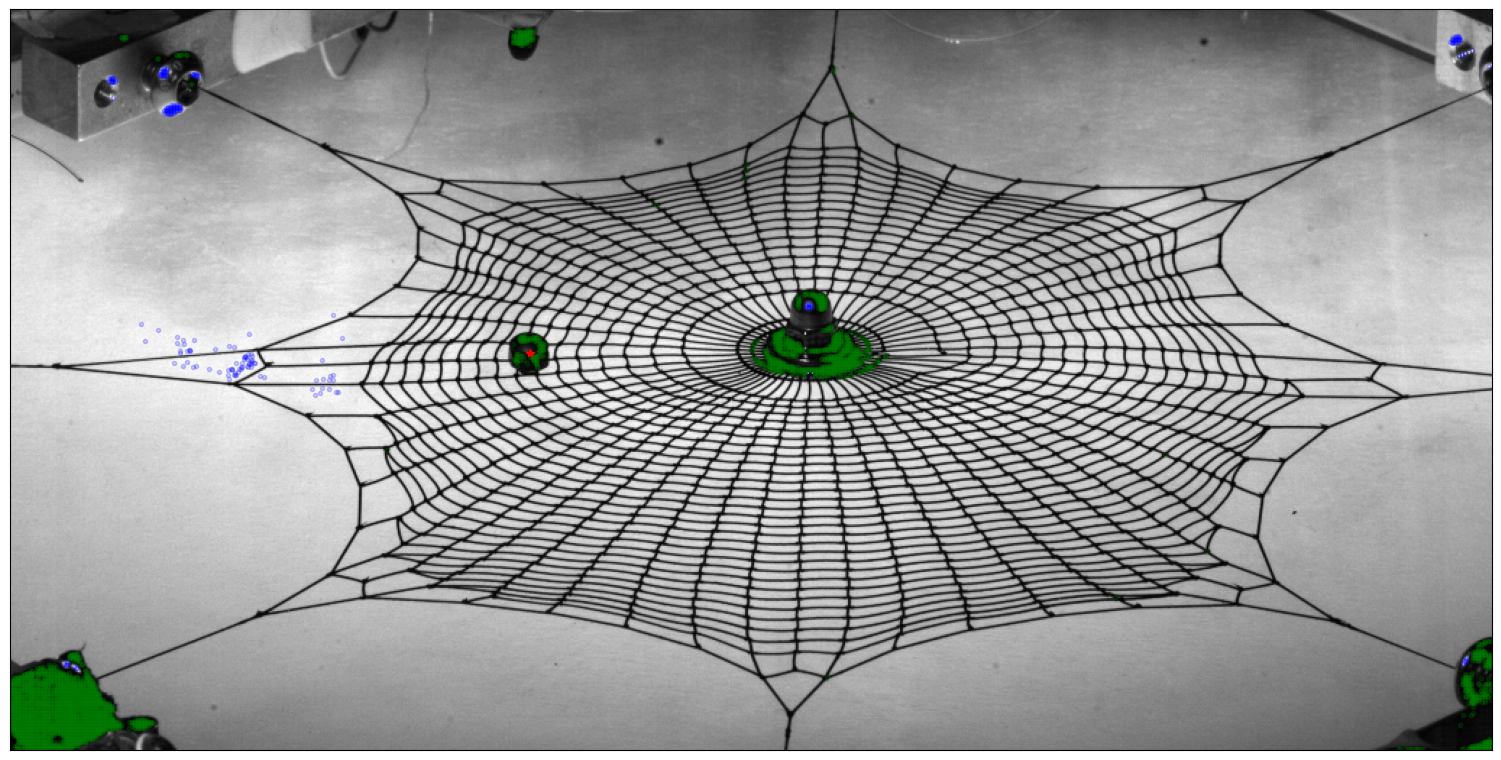

(<Figure size 1800x800 with 1 Axes>, <Axes: >)

In [3]:
%matplotlib inline
peak_n = 1
sequential_image_n = 0
EMA_structure.nut_idx((EMA_structure.prey_ij[0]+5, EMA_structure.prey_ij[1]), exclude_high_amplitude = True, d_lim =25)
EMA_structure.plot_still_frame(video, sequential_image_n, show_saturation = True, tp_nut = True, tp = False, valid_only=True)

In [4]:
%matplotlib qt
td = EMA_structure.d +  EMA_structure.tp.reshape(len(EMA_structure.tp),1,2)
ani = EMA_structure.play_video(video, range(0,video.N-1), interval=30, points=td)

In [5]:
delta_frames = 1
bit_depth = 16
bits = 2**bit_depth-1
i = 100
td_i = td[i,np.newaxis,:]
axis = [[td_i[0,0,1]-roi_size[1], td_i[0,0,1]+roi_size[1]], [td_i[0,0,0]-roi_size[0], td_i[0,0,0]+roi_size[0]]]
ani = EMA_structure.play_video_movement(video, frame_range= range(1,5000), frame_delay = delta_frames, interval=30, bit_depth = bit_depth, v_lims = [bits*.4, bits*.6], include_W=True, points=td[100,np.newaxis,:], axis=axis, include_G=True)

In [ ]:
import importlib
import EMA_functions
importlib.reload(EMA_functions)
from EMA_functions import *
roi_size = (9, 9)
d = EMA_structure.d[EMA_structure.nearest_nut_index]
# dd = np.diff(d, axis = 0)
point_ij = EMA_structure.tp[EMA_structure.nearest_nut_index]
EMA_structure.play_video_local(video, frame_range= range(100,5000), frame_delay = delta_frames, point=point_ij, d=d, roi_size=roi_size, interval=30,bit_depth = 16, v_lims = [bits*.45, bits*.55])

In [ ]:
%matplotlib qt
EMA_structure.initialize_signals()
EMA_structure.initialize_displacement(idx='all', dir='y')
first_zero_id_cam = EMA_structure.find_signal_start(EMA_structure.displacements_raw[EMA_structure.nearest_nut_index], treshold=0.08, approximate_height = 1)
first_zero_id_force = EMA_structure.find_signal_start(EMA_structure.force_raw, peak_n=peak_n, treshold=0.05)
zeros_camera    = EMA_structure.greatest_common_divisor(EMA_structure.fs_camera, EMA_structure.fs_force)
zeros_force     = EMA_structure.n_samples_camera_to_force(zeros_camera)

# Substract mean
mean_id_range = [first_zero_id_force-90,first_zero_id_force-20]
EMA_structure.force_raw = EMA_structure.substract_mean(EMA_structure.force_raw,mean_id_range[0], mean_id_range[1])

# Shift and align signals
EMA_structure.t_camera = EMA_structure.shift_time(EMA_structure.t_camera_raw, EMA_structure.t_camera_raw[first_zero_id_cam-zeros_camera])
EMA_structure.t_force = EMA_structure.shift_time(EMA_structure.t_force_raw, EMA_structure.t_force_raw[first_zero_id_force-zeros_force])

# Clip signals
EMA_structure.t_camera          = EMA_structure.clip_signal_before(EMA_structure.t_camera,first_zero_id_cam-zeros_camera)
EMA_structure.displacements     = EMA_structure.clip_signal_before(EMA_structure.displacements_raw, first_zero_id_cam-zeros_camera)
EMA_structure.t_force           = EMA_structure.clip_signal_before(EMA_structure.t_force, first_zero_id_force-zeros_force)
EMA_structure.force             = EMA_structure.clip_signal_before(EMA_structure.force_raw, first_zero_id_force-zeros_force)

last_id_force, last_id_camera   = EMA_structure.find_last_common_time_ids(EMA_structure.t_camera, EMA_structure.t_force)
EMA_structure.t_camera          = EMA_structure.clip_signal_after(EMA_structure.t_camera, last_id_camera)
EMA_structure.displacements     = EMA_structure.clip_signal_after(EMA_structure.displacements, last_id_camera)
EMA_structure.t_force           = EMA_structure.clip_signal_after(EMA_structure.t_force, last_id_force)
EMA_structure.force             = EMA_structure.clip_signal_after(EMA_structure.force, last_id_force)

# plot signals
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
ax[0].plot(EMA_structure.t_force_raw, EMA_structure.force_raw)
ax[0].plot(EMA_structure.t_force_raw[first_zero_id_force], EMA_structure.force_raw[first_zero_id_force],'ro')
ax[0].set_xlim([EMA_structure.t_force_raw[first_zero_id_force] - 0.01, EMA_structure.t_force_raw[first_zero_id_force] + 0.01])
ax[0].plot(EMA_structure.t_force_raw[mean_id_range], EMA_structure.force_raw[mean_id_range],'go')
ax[1].plot(EMA_structure.t_camera_raw, EMA_structure.displacements_raw[EMA_structure.nearest_nut_index])
ax[1].plot(EMA_structure.t_camera_raw[first_zero_id_cam], EMA_structure.displacements_raw[EMA_structure.nearest_nut_index, first_zero_id_cam],'ro')
ax[2].plot(EMA_structure.t_force_raw, EMA_structure.force_raw)

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].plot(EMA_structure.t_force, EMA_structure.force)
# ax[0].set_xlim([-0.02, 0.02])
ax[0].set_ylim([np.min(EMA_structure.force), EMA_structure.F_peak])
ax[1].plot(EMA_structure.t_camera, EMA_structure.displacements[EMA_structure.nearest_nut_index])
# ax[1].set_xlim([-0.02, 0.02])
#  Zero signals
EMA_structure.force = EMA_structure.zero_signal_treshold(EMA_structure.force, 0.1)
ax[0].plot(EMA_structure.t_force, EMA_structure.force, 'r-')

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(20,5))
ax0_2 = ax[0].twinx()
ax1_2 = ax[1].twinx()
ax0_2.plot(EMA_structure.t_force, EMA_structure.force,'b-', label='Force (raw))')
ax[0].plot(EMA_structure.t_camera, EMA_structure.displacements[EMA_structure.nearest_nut_index,:],'r--', label=f'Displacement nut')
ax[0].set_xlim([-0.02, EMA_structure.t_camera[-1]])

ax[0].set_ylabel('pixels (-)')
ax0_2.set_ylabel('Force (N)')
ax[0].legend(loc='upper right')


ax1_2.plot(EMA_structure.t_force, EMA_structure.force,'b*-', label='Force')
ax[1].plot(EMA_structure.t_camera, EMA_structure.displacements[EMA_structure.nearest_nut_index,:],'r*--', label=f'Displacement nut')
# ax[1].plot(t_camera2[disp_peaks], disp_nut[disp_peaks], 'rx')
ax[1].set_xlim([0, 0.003])
ax[1].set_ylabel('pixels (-)')
ax1_2.set_ylabel('Force (N)')

# set legend to north east
ax1_2.legend()
ax[1].set_xlabel('Time (s)')
plt.show()
fig.savefig(os.path.join(EMA_structure.root_simulations, 'signals', f'{EMA_structure.file_name} - example impact.png'), dpi=300, bbox_inches='tight')

In [ ]:
%matplotlib qt
EMA_structure.set_freq_properties(padding_ratio=1)
EMA_structure.get_transfer_function()
# EMA_structure.valid_tp(d_lim = 15, z_limit = 0.02, h_type = 'H1')
EMA_structure.valid_tp(d_lim = 25, z_limit = 0.2, h_type = 'H1', d_min=.1)
H_max = np.max(np.abs(EMA_structure.H1), axis=1)
H_low = H_max<1e6
EMA_structure.valid_tps = EMA_structure.valid_tps & H_low

print(np.sum(~EMA_structure.exclude_outliers))
print(f'Number of valid points is: {len(EMA_structure.tp[EMA_structure.valid_tps])}/{EMA_structure.tp.shape[0]}')
ani = EMA_structure.play_video(video, range(200,9999), interval=30, points=td[EMA_structure.valid_tps])

plt.figure(figsize=(15, 5))
plt.semilogy(EMA_structure.freq_force, np.abs(EMA_structure.force_fft), label='Force')
plt.semilogy(EMA_structure.freq_camera, np.abs(EMA_structure.disp_fft[EMA_structure.nearest_nut_index]), label='Displacement')
# plt.semilogy(freq_camera, np.abs(Disp[tp_id])/ np.abs(Force), label='output/input')
# plt.semilogy(freq_camera, np.abs(Disp[nearest_index]), label='Displacement nut')
plt.xlim(0, 200)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Force [N], Displacment [m] amplitude spectra')
plt.legend()

coh = np.mean(np.abs(EMA_structure.H1[EMA_structure.valid_tps] / EMA_structure.H2[EMA_structure.valid_tps]), axis=0)

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(15, 9))
ax[0].plot(EMA_structure.freq_camera, np.abs(EMA_structure.H1[EMA_structure.valid_tps][0]), 'k', linewidth=0.1, alpha=0.1, label='|H1i|')
ax[0].plot(EMA_structure.freq_camera, np.mean(np.abs(EMA_structure.H1[EMA_structure.valid_tps]), axis=0),'g', label='|H1| mean')
ax[1].semilogy(EMA_structure.freq_camera, np.mean(np.abs(EMA_structure.H1[EMA_structure.valid_tps]), axis=0),'g', label='|H1| mean')
for tp_id in range(1, len(EMA_structure.tp[EMA_structure.valid_tps]),15):
    ax[0].plot(EMA_structure.freq_camera, np.abs(EMA_structure.H1[EMA_structure.valid_tps][tp_id]), 'k', linewidth=0.1, alpha=0.1)
    ax[1].semilogy(EMA_structure.freq_camera, np.abs(EMA_structure.H1[EMA_structure.valid_tps][tp_id]), 'k', linewidth=0.1, alpha=0.1)
ax[0].set_ylabel('|H|')
ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
# ax[0].set_ylim(0, 6000)
ax[0].legend()
# set the x-ticks
xticks = np.linspace(0, 100, 21)
ax[0].set_xticks(xticks)
ax[0].grid(axis='x', which='both')
# show the plot
plt.show()


In [ ]:
EMA_structure.save()

In [ ]:
cam = EMA.Model(EMA_structure.H1[EMA_structure.valid_tps], EMA_structure.freq_camera, lower=5, upper=100, pol_order_high=80, frf_type = 'accelerance')
cam.get_poles(show_progress=True)
# cam.Select_poles.chart_type = 1
cam.select_poles()

In [ ]:
cam.F_peak = EMA_structure.F_peak
cam.peak_n = peak_n
with open(os.path.join(EMA_structure.root_cam, f'{EMA_structure.file_name}_cam.pkl'), 'wb') as f:
    pickle.dump(cam, f)
cam.print_modal_data()
cam.F_peak, file_name

In [ ]:
fig, ax = plot_FRF(cam)
fig.savefig(os.path.join(EMA_structure.root_simulations, 'FRFs', f'FRF_{EMA_structure.file_name}_v0.png'))
fig = plot_MAC(cam)
fig.savefig(os.path.join(EMA_structure.root_simulations, 'MAC', f'MAC_{EMA_structure.file_name}_v0.png'))
# fig, ax, GREEN = find_green(cam, plot = True)

In [ ]:
idx = np.where(EMA_structure.tp[EMA_structure.valid_tps] == EMA_structure.nearest_nut_index)[0]
root_mode_shapes = os.path.join(EMA_structure.root_simulations, 'web mode shapes', EMA_structure.file_name)
for mode in range(len(cam.nat_freq)):
    fig, ax = plot_mode_shape(cam, mode,  EMA_structure.tp[EMA_structure.valid_tps], idx, view = (26, -72) )
    fig.savefig(os.path.join(root_mode_shapes, f'Mode_shape_{EMA_structure.file_name}_{mode}.png'), dpi=300, bbox_inches='tight')
    plt.close()

In [ ]:
%matplotlib qt

if not os.path.exists(root_mode_shapes):
    os.makedirs(root_mode_shapes)

for mode_number in range(len(cam.nat_freq)): # range(14,n_modes): #  [22]: # 
    print(f'mode_number: {mode_number}')
    ani  = animate_mode_shape(cam, mode_number, EMA_structure.tp[EMA_structure.valid_tps]) #, indices_to_plot = indices_to_plot np.delete(tp_lim, biggest_outliers, axis=0)
    writer = animation.FFMpegWriter(fps=60)
    ani.save(os.path.join(root_mode_shapes, f'Mode_shape_{EMA_structure.file_name}_{mode_number}.mp4'), writer=writer)
    plt.close()
